# Image Processing Concepts

## Spatial Operations
- **Definition**: Spatial operations involve manipulating the pixels of an image directly based on their spatial relationships.
- **Applications**: Used for tasks like blurring, sharpening, and edge detection.

## Convolution
- **What it is**: A mathematical operation that combines two functions to produce a third function. In image processing, it involves applying a filter (kernel) to an image.
- **Process**:
  - A kernel (small matrix) is defined, which is moved across the image.
  - At each position, the kernel values are multiplied by the corresponding pixel values, and the results are summed to produce a new pixel value.
- **Example**: A common kernel for blurring is:
  ```python
  kernel = [[1/9, 1/9, 1/9],
            [1/9, 1/9, 1/9],
            [1/9, 1/9, 1/9]]
    ```


## Edge Detection

- **Purpose**: To identify the boundaries within images where there is a significant change in intensity.

### Techniques:
**Sobel Operator**: A popular method that uses two 3x3 kernels to detect edges in horizontal and vertical directions.
**Canny Edge Detection**: A multi-stage algorithm that detects a wide range of edges in images.


## Median Filters

**Function**: A non-linear filter that replaces each pixel's value with the median value of the intensities in its neighborhood.
**Benefits**: Effective in removing 'salt and pepper' noise while preserving edges better than linear filters.
Example: In a 3x3 neighborhood, the median is calculated and replaces the center pixel.


## Image Sharpening

**Goal**: To enhance the clarity of an image by increasing the contrast between adjacent pixels.

### Techniques
**Unsharp Masking**: Involves subtracting a blurred version of the image from the original image.

**Laplacian Filter**: A second derivative filter that highlights regions of rapid intensity change.

# Pixel Transformations

Definition: Changes the intensity of an image one pixel at a time.
Types:
**Intensity Transformations**: Depend on a single pixel (i,j).
**Neighborhood Transformations**: Depend on surrounding pixels.

## Histograms
**Purpose**: Counts occurrences of pixel intensities to understand and manipulate images.

**Histogram Representation**:
Array index represents intensity levels (0-255 for grayscale).
Bar graph visualizes the distribution of pixel intensities.

The histogram is a function where $h[r]$  where   $r \in {0,1,2} $. In the above example  $h[0]=1$,$h[1]=5$ and $h[2]=3$




# Trying things out in code

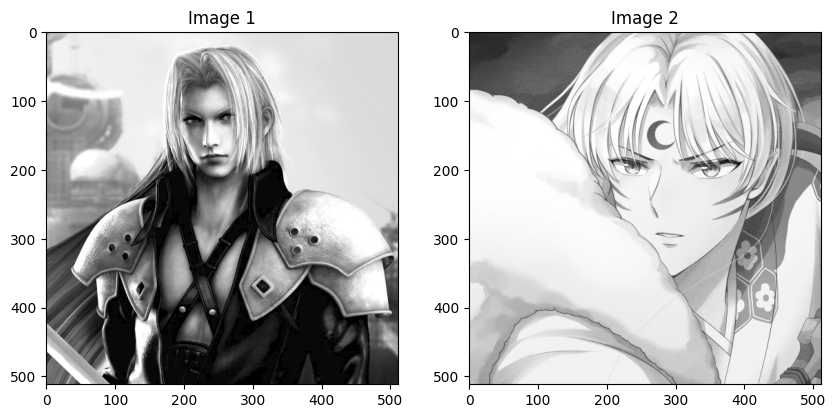

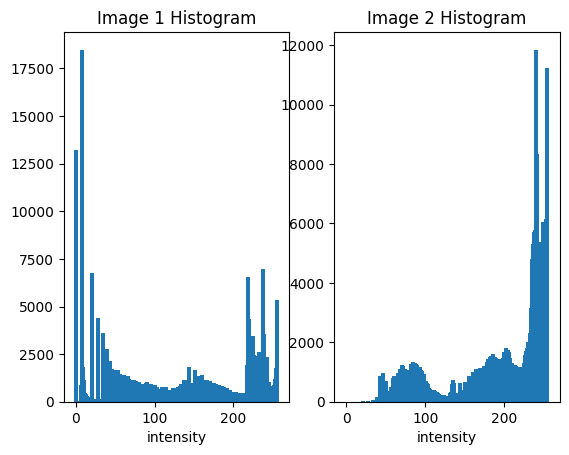

In [20]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

#Defining two helper functions, one to plot(blit?) two pictures next to eachother, the other the same but for histograms

def plot_comparison_images(img1, img2, title1 = "Image 1", title2 = "Image 2"):
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 2, 1)
    img1 = cv2.imread(img1, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img1, cmap="gray")
    plt.title(title1)
    plt.subplot(1, 2, 2)
    img2 = cv2.imread(img2, cv2.IMREAD_GRAYSCALE)
    plt.imshow(img2, cmap="gray")
    plt.title(title2)
    plt.show()

#CV2 calcHist is used to generate the histogram (shocker!), the paramenters are as following: cv2.calcHist(CV array:[image] this is the image channel:[0],for this course it will always be [None],the number of bins:[L],the range of index of bins:[0,L-1]) 
def plot_comparison_hist(img1, img2, title1 = "Image 1 Histogram", title2= "Image 2 Histogram"):
    intesity_values = np.array([x for x in range(256)])
    plt.subplot(1, 2, 1)
    img1 = cv2.imread(img1, cv2.IMREAD_GRAYSCALE)
    plt.bar(intesity_values, cv2.calcHist([img1], [0], None, [256], [0, 256]) [:,0], width= 5)
    plt.title(title1)
    plt.xlabel('intensity')
    plt.subplot(1, 2, 2)
    img2 = cv2.imread(img2, cv2.IMREAD_GRAYSCALE)
    plt.bar(intesity_values, cv2.calcHist([img2], [0], None, [256], [0, 256]) [:, 0], width= 5)
    plt.title(title2)
    plt.xlabel('intensity')
    plt.show()

plot_comparison_images("imgs/seph.png", "imgs/sesshomaru.png")
plot_comparison_hist("imgs/seph.png", "imgs/sesshomaru.png")

# Gray Scale Histograms

Histograms are used in grayscale images. Grayscale images are used in many applications, including medical and industrial. Color images are split into luminance and chrominance. The luminance is the grayscale portion and is usually processed in many applications.

The example below takes an image, reads it as a grayscale and creates a Bar Graph Histogram and Probability Mass Function (PMF) by normalizing the bar graph by the number of pixels.

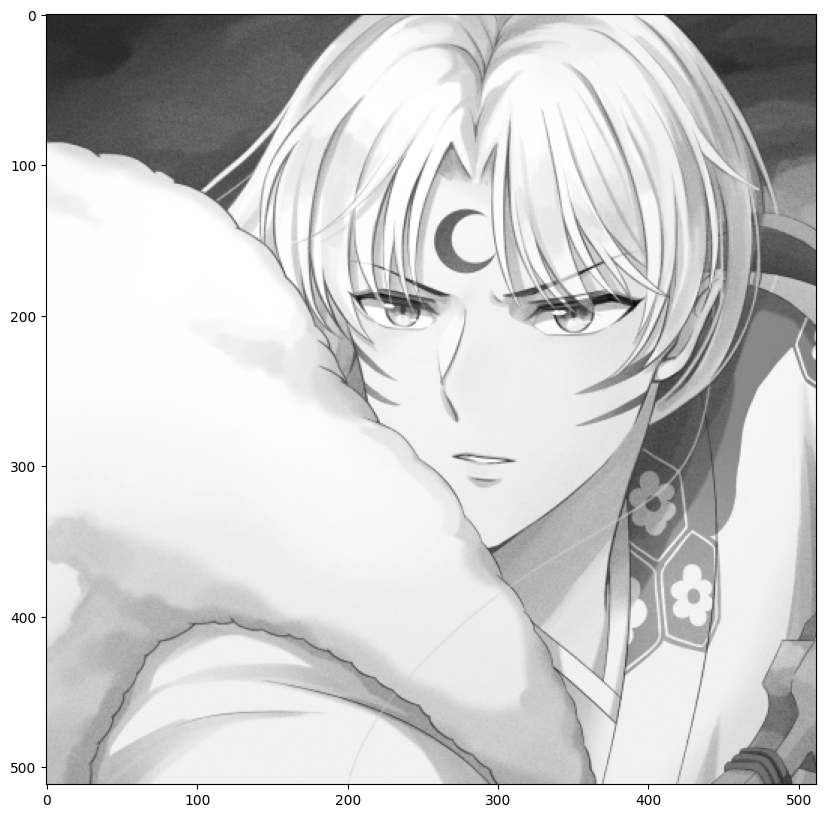

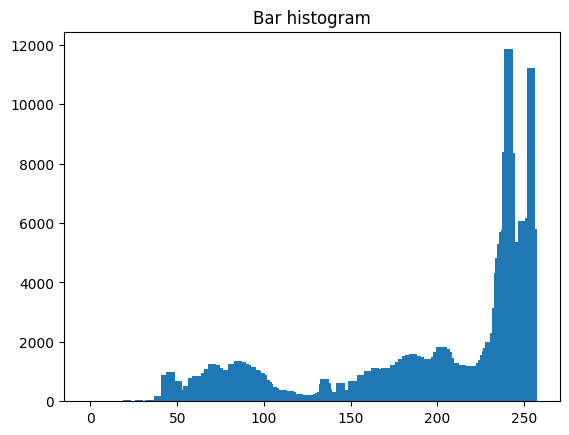

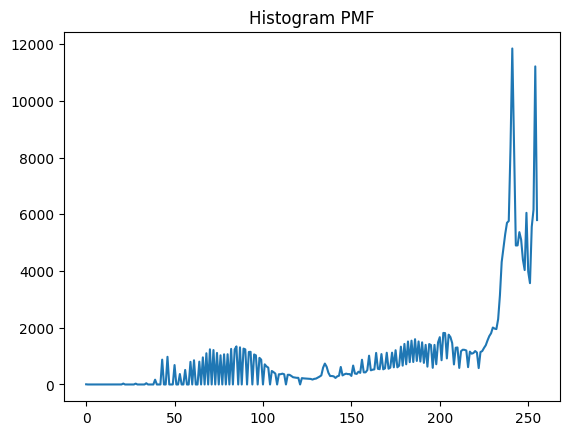

In [21]:
sesshomaru = cv2.imread("imgs/sesshomaru.png", cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(10,10))
plt.imshow(sesshomaru, cmap="gray")
plt.show()

hist = cv2.calcHist([sesshomaru],[0], None, [256], [0,256])
intensity_values = np.array([x for x in range(hist.shape[0])])
plt.bar(intensity_values, hist[:,0], width = 5)
plt.title("Bar histogram")
plt.show()

#Probability mass function
PMF = hist / (sesshomaru.shape[0] * sesshomaru.shape[1])
plt.plot(intensity_values, hist)
plt.title("Histogram PMF")
plt.show()

## Intensity Transformation Example
**Linear Transform**:
- Converts image array f to array g.
- Changes histogram by mapping intensity values from r to s.
**Effect on Histogram**:
- Shifts and scales the histogram based on the transformation applied.

**Maths Behind It**
It's helpful to think of an image as a function $f(x,y)$ instead of an array at this point, where `x` is the row index and `y` is the column index. You can apply a transformation $T$ to the image and get a new image: 
$$
g(x,y)=T(f(x,y))
$$

An Intensity Transformation depends on only one single point $(x,y)$. For example, you can apply a linear transform $g(x,y) = 2f(x,y) + 1$; this will multiply each image pixel by two and add one.

As the Intensity transforms only depend on one value; as a result, it is sometimes referred to as a gray-level mapping. The variable if $r$ is the gray level intensity, similar to the histogram values. The new output s is given by:

$$
s=T(r)
$$


## Image Negatives
Definition: Reverses intensity levels to enhance image details.

Process:
Apply a transformation that flips intensity values (e.g., 0 to 255).

**Maths Behind It:**
Consider an image with $L$ intensity values ranging from $[0,L-1]$.  We can reverse the intensity levels by applying the following:
$$
g(x,y)=L-1-f(x,y)
$$

Using the intensity transformation function notation 
$$
s = L - 1 - r
$$

This is called the image negative. For $L= 256$ the formulas simplifys to:
$$
g(x,y)=255-f(x,y) \quad \ and \quad s=255-r
$$

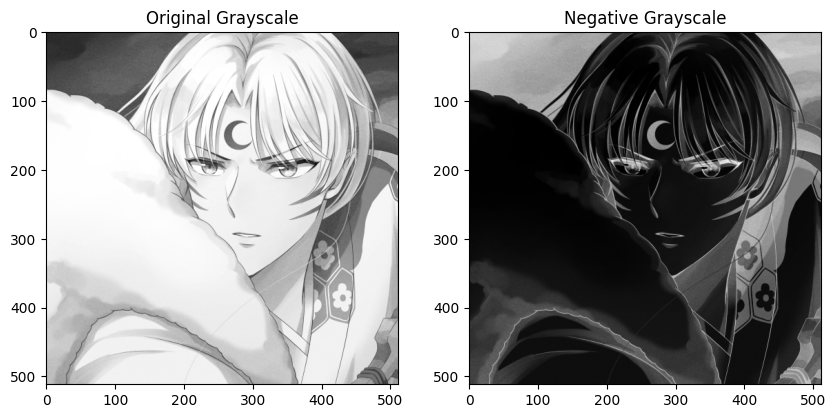

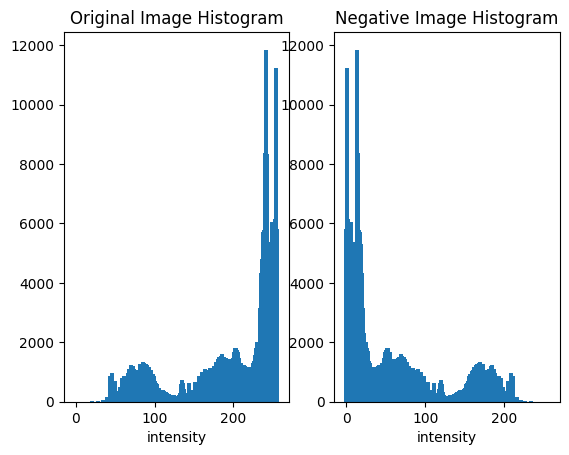

In [28]:
neg_sesshomaru =  -sesshomaru + 255 #-1 * image + 255
cv2.imwrite("imgs/neg_sesshomaru.png", neg_sesshomaru)
neg_sesshomaru = "imgs/neg_sesshomaru.png"
sesshomaru = "imgs/sesshomaru.png"

plot_comparison_images(sesshomaru, neg_sesshomaru, "Original Grayscale", "Negative Grayscale")
plot_comparison_hist(sesshomaru, neg_sesshomaru, "Original Image Histogram", "Negative Image Histogram")

## Brightness and Contrast Adjustments
**Linear Model**:
Alpha (α): Controls contrast.
Beta (β): Controls brightness.
Function Used: convertScaleAbs to ensure intensity values fall within 0-255.
**Maths Behind It**
The image is $f(x,y)$ and the transformed image is $g(x,y)$, where $g(x,y) = \alpha f(x,y) + \beta$.


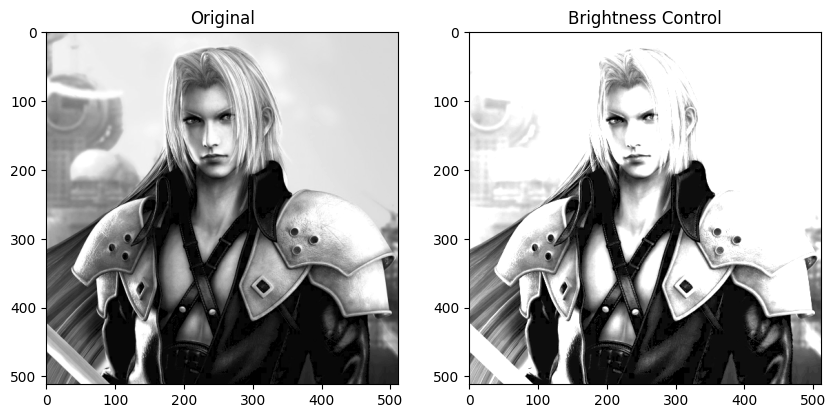

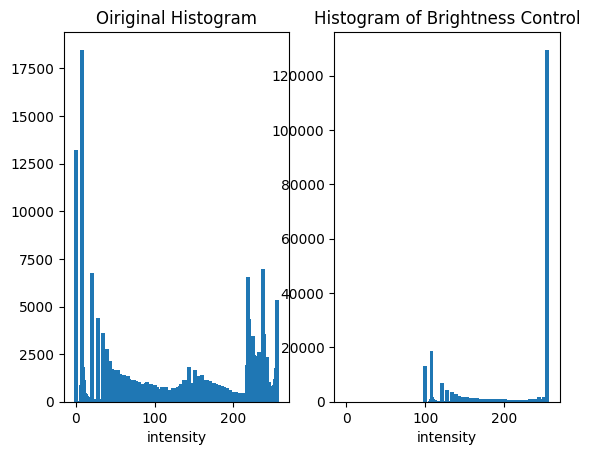

In [36]:
alpha = 1
beta = 100
sephiroth = cv2.imread("imgs/seph.png", cv2.IMREAD_GRAYSCALE)
new_img = cv2.convertScaleAbs(sephiroth, alpha=alpha, beta=beta)
cv2.imwrite("imgs/seph_brightnesscontrol.png", new_img)
plot_comparison_images("imgs/seph.png", "imgs/seph_brightnesscontrol.png", "Original", "Brightness Control")
plot_comparison_hist("imgs/seph.png", "imgs/seph_brightnesscontrol.png", "Oiriginal Histogram", "Histogram of Brightness Control")

## Histogram Equalization
Purpose: Improves contrast by flattening the histogram.
Function: equalizeHist adjusts the image based on its histogram.

## Thresholding and Segmentation
**Threshold Function:** Applies a threshold to every pixel to extract objects.
Example:
If pixel > threshold, set to 255; otherwise, set to 0.

**Bimodal Histogram**:
Can be used to segment objects (e.g., separating a person from the background).

## OTSU Method

Definition: Automatically selects the optimal threshold value.
Output: Similar results to manual thresholding but more efficient.